In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [3]:
import torch

In [4]:
from tensor import Tensor

In [5]:
a = Tensor(np.array([230.3], dtype=np.float32))
b = Tensor(np.array([33.2], dtype=np.float32))

In [6]:
def f(a, b):
    return (a / b - a) * (b / a + a + b) * (a - b)

In [7]:
y = f(a,b)

In [8]:
y.backward()

In [9]:
a.grad, b.grad

(array([-153284.84], dtype=float32), array([3815.038], dtype=float32))

In [32]:
a = Tensor(np.array([1], dtype=np.float32), name='a')
b = Tensor(np.array([2], dtype=np.float32), name='b')
c = Tensor(np.array([3], dtype=np.float32), name='c')

In [11]:
a = torch.tensor(np.array([1], dtype=np.float32), requires_grad=True)
b = torch.tensor(np.array([2], dtype=np.float32), requires_grad=True)
c = torch.tensor(np.array([3], dtype=np.float32), requires_grad=True)

In [33]:
d = (a * b).sin()
e = (c - (a / b)).exp()
f = d + e
y = (f * f * f * f).log() * c
y

tensor([30.863823], dtype=float32)

In [13]:
# For pytorch
d.retain_grad(); e.retain_grad(); f.retain_grad()

In [34]:
y.backward()

In [35]:
a.grad, b.grad, c.grad, d.grad, e.grad, f.grad

(array([-6.3461523], dtype=float32),
 array([2.4101915], dtype=float32),
 array([21.454475], dtype=float32),
 array([0.9166051], dtype=float32),
 array([0.9166051], dtype=float32),
 array([0.9166051], dtype=float32))

In [16]:
a.grad, b.grad, c.grad, d.grad, e.grad, f.grad

(tensor([-6.3462]),
 tensor([2.4102]),
 tensor([21.4545]),
 tensor([0.9166]),
 tensor([0.9166]),
 tensor([0.9166]))

In [26]:
a = Tensor(np.array([2], dtype=np.float32), name='a')

In [18]:
a = torch.tensor(np.array([2], dtype=np.float32), requires_grad=True)

In [27]:
def f(a):
    b = a.sin()
    c = a.log()
    d = c/b*a
    return (c+d-a).exp()

In [28]:
e = f(a)

tensor([1.2432449], dtype=float32)

In [21]:
# For pytorch
b.retain_grad(); c.retain_grad(); d.retain_grad(); e.retain_grad()

In [29]:
e.backward()

In [30]:
a.grad, b.grad, c.grad, d.grad, e.grad

(array([2.5608027], dtype=float32),
 array([-2.084492], dtype=float32),
 array([3.9777625], dtype=float32),
 array([1.2432449], dtype=float32),
 array([1.], dtype=float32))

In [24]:
a.grad, b.grad, c.grad, d.grad, e.grad

(tensor([2.5608]),
 tensor([-2.0845]),
 tensor([3.9778]),
 tensor([1.2432]),
 tensor([1.]))

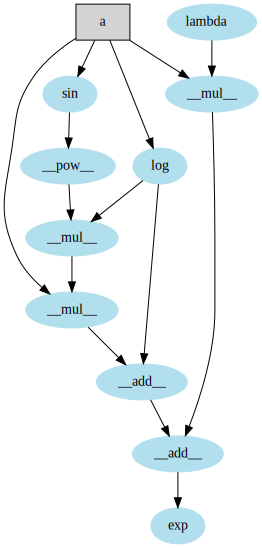

In [31]:
e.generate_graph()